### Imports

In [15]:
import numpy as np

import sympy as sym

import itertools

import pandas as pd

import glob

In [2]:
from operator import itemgetter

In [3]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [9]:
import matplotlib.colors as colors

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 13

## Evolutionary simulations

In [10]:
cs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [11]:
names1 = [f"p_{i}" for i in range(1, 3)] + ["t", "cooperation"]
names2 = [f"p_{i}" for i in range(1, 5)] + ["t", "cooperation"]
names3 = [f"p_{i}" for i in range(1, 9)] + ["t", "cooperation"]

In [12]:
def frequencies(df, max_steps=10 ** 7):

    frequencies = []
    previous = 0
    for value in df["t"][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(max_steps - previous)

    df["frequencies"] = np.array(frequencies)
    df["frequencies norm"] = np.array(frequencies) / max_steps

    return df

### Seed 2

In [29]:
files = glob.glob('../data/beta_10/bits_2_beta_10_seed_2_c_*.csv')

one_bits = []

for file in files:
    
    c = float(file.split("c_")[1].split(".csv")[0])
    
    df = pd.read_csv(file, names=names1)
    
    df = df.drop_duplicates()
    
    df['c'] = c
    
    df = frequencies(df, 10 ** 7)
    
    one_bits.append(df)
    

In [31]:
one_bits = pd.concat(one_bits)

In [57]:
top_strategies = one_bits[one_bits['c'] == .5].sort_values('frequencies').iloc[-10:]

In [59]:
files = glob.glob('../data/beta_10/bits_4_beta_10_seed_2_c_*.csv')

two_bits = []

for file in files:
    
    c = float(file.split("c_")[1].split(".csv")[0])
    
    df = pd.read_csv(file, names=names2)
    
    df = df.drop_duplicates()
    
    df['c'] = c
    
    df = frequencies(df, 10 ** 7)
    
    two_bits.append(df)
    

In [60]:
two_bits = pd.concat(two_bits)

In [61]:
top_strategies_two = two_bits[two_bits['c'] == .5].sort_values('frequencies').iloc[-10:]

In [66]:
df = pd.read_csv("../data/beta_10/bits_4_beta_1_seed_2_c_0.5.csv")

,p_1,p_2,p_3,p_4,t,cooperation,c,frequencies,frequencies norm
13047,0.140908,0.989430,0.001585,0.110641,7410007,0.455859,0.5,152619,0.015262
8394,0.048137,0.991258,0.025864,0.136344,4498991,0.430847,0.5,177208,0.017721
3078,0.304695,0.008184,0.980249,0.143423,1617548,0.453290,0.5,191299,0.019130
11282,0.172060,0.006699,0.984806,0.157245,6222193,0.462236,0.5,205760,0.020576
516,0.256505,0.001411,0.995099,0.026841,173528,0.447571,0.5,226800,0.022680
13156,0.144941,0.999457,0.008759,0.110689,7608009,0.473452,0.5,249056,0.024906
8775,0.206902,0.995506,0.000376,0.047401,4784750,0.456928,0.5,260511,0.026051
15501,0.504623,0.986534,0.005712,0.147627,9318091,0.461935,0.5,335494,0.033549
13046,0.203582,0.992303,0.017073,0.157156,7061991,0.457456,0.5,348016,0.034802
14190,0.333471,0.974295,0.003058,0.154940,8297614,0.437278,0.5,559800,0.055980


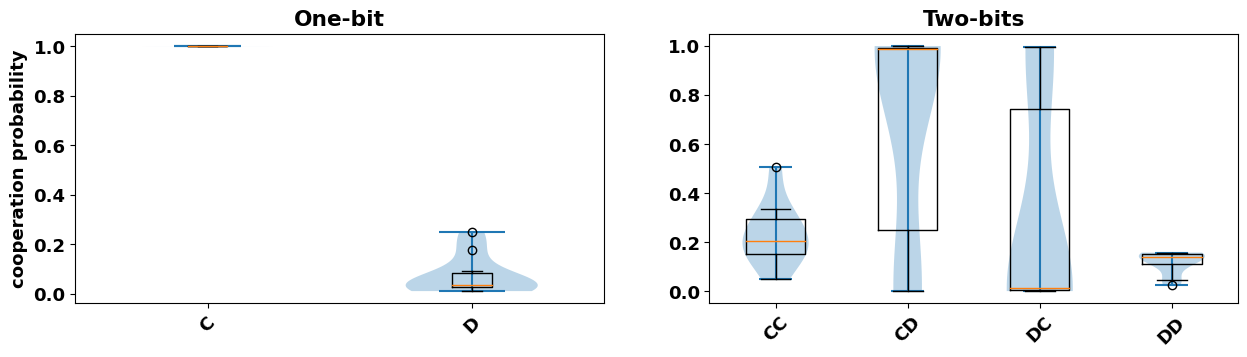

In [65]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 3.5))

axes[0].violinplot([top_strategies['p_1'].values, top_strategies['p_2'].values])

axes[0].boxplot([top_strategies['p_1'], top_strategies['p_2']])

axes[1].violinplot([top_strategies_two['p_1'],
                 top_strategies_two['p_2'],
                 top_strategies_two['p_3'],
                 top_strategies_two['p_4'],])

axes[1].boxplot([top_strategies_two['p_1'],
                 top_strategies_two['p_2'],
                 top_strategies_two['p_3'],
                 top_strategies_two['p_4'],])



        
axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(["C", "D"], rotation=45)
axes[0].set_title("One-bit", fontweight="bold")
axes[0].set_ylabel("cooperation probability")


axes[1].set_xticks([1, 2, 3, 4])
axes[1].set_xticklabels(["CC", "CD", "DC", "DD"], rotation=45)
axes[1].set_title("Two-bits", fontweight="bold");

# axes[2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
# axes[2].set_xticklabels(["CCC", "CCD", "CDC", "CDD", "DCC", "DCD", "DDC", "DDD"], rotation=45)
# axes[2].set_title("Three-bits", fontweight="bold");

# plt.savefig("../static/evolution_results_boxplots.pdf", bbox_inches='tight')

## $\beta=0.1$

In [8]:
beta = 0.1

dfs = []

for sdim, label, max_step, name in zip([2, 4, 8],
                                       ['one', 'two', 'three'],
                                       [10 ** 7, 10 ** 7, 2 * 10 ** 7], 
                                       [names1, names2, names3]):
    
    for c in cs:

        df = pd.read_csv(f"../data/matlab_data/bits_{sdim}_beta_0.1_seed_1_c_{c}.csv", names=name)
        
        df = df.drop_duplicates()

        df['beta'] = beta
        df['c'] = c
        df['type'] = f'{label}-bit'
        
        df = frequencies(df, max_step)

        dfs.append(df)


FileNotFoundError: [Errno 2] No such file or directory: '../data/matlab_data/bits_2_beta_0.1_seed_1_c_0.csv'

In [32]:
df = pd.concat(dfs)

In [34]:
df.to_csv("../evolution_for_beta_0_1.csv")

## $\beta=1$

In [37]:
beta = 1

dfs = []

for sdim, label, max_step, name in zip([2, 4, 8],
                                       ['one', 'two', 'three'],
                                       [10 ** 7, 10 ** 7, 2 * 10 ** 7], 
                                       [names1, names2, names3]):
    
    for c in cs:

        df = pd.read_csv(f"../data/matlab_data/bits_{sdim}_beta_{beta}_seed_1_c_{c}.csv", names=name)
        
        df = df.drop_duplicates()

        df['beta'] = beta
        df['c'] = c
        df['type'] = f'{label}-bit'
        
        df = frequencies(df, max_step)

        dfs.append(df)

In [38]:
df = pd.concat(dfs)

In [39]:
df.to_csv("../evolution_for_beta_1.csv")

## $\beta = 10$

In [40]:
beta = 10

dfs = []

for sdim, label, max_step, name in zip([2, 4, 8],
                                       ['one', 'two', 'three'],
                                       [10 ** 7, 10 ** 7, 2 * 10 ** 7], 
                                       [names1, names2, names3]):
    
    for c in cs:

        df = pd.read_csv(f"../data/matlab_data/bits_{sdim}_beta_{beta}_seed_1_c_{c}.csv", names=name)
        
        df = df.drop_duplicates()

        df['beta'] = beta
        df['c'] = c
        df['type'] = f'{label}-bit'
        
        df = frequencies(df, max_step)

        dfs.append(df)

In [46]:
for sdim, label, max_step, name in zip([2, 4],
                                       ['one', 'two', 'three'],
                                       [10 ** 7, 10 ** 7, 2 * 10 ** 7], 
                                       [names1, names2, names3]):
    
    for c in cs:

        df = pd.read_csv(f"../data/matlab_data/bits_{sdim}_beta_{beta}_seed_2_c_{c}.csv", names=name)
        
        df = df.drop_duplicates()

        df['beta'] = beta
        df['c'] = c
        df['type'] = f'{label}-bit'
        
        df = frequencies(df, max_step)

        dfs.append(df)

In [47]:
df = pd.concat(dfs)

In [48]:
df

,p_1,p_2,t,cooperation,beta,c,type,frequencies,frequencies norm,p_3,p_4,p_5,p_6,p_7,p_8
0,0.000000,0.000000,0,0.000000,10,0.0,one-bit,16,1.600000e-06,NaN,NaN,NaN,NaN,NaN,NaN
1,0.563679,0.230434,16,0.345606,10,0.0,one-bit,1,1.000000e-07,NaN,NaN,NaN,NaN,NaN,NaN
2,0.345231,0.773513,17,0.541569,10,0.0,one-bit,7,7.000000e-07,NaN,NaN,NaN,NaN,NaN,NaN
3,0.315554,0.133239,24,0.162946,10,0.0,one-bit,2,2.000000e-07,NaN,NaN,NaN,NaN,NaN,NaN
4,0.862921,0.294021,26,0.682026,10,0.0,one-bit,6,6.000000e-07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,0.356947,0.621388,9937818,0.484132,10,1.0,two-bit,6,6.000000e-07,0.358953,0.584634,NaN,NaN,NaN,NaN
466,0.522066,0.245513,9937824,0.370452,10,1.0,two-bit,11,1.100000e-06,0.205701,0.487549,NaN,NaN,NaN,NaN
467,0.696916,0.232942,9937835,0.100310,10,1.0,two-bit,8,8.000000e-07,0.497580,0.033809,NaN,NaN,NaN,NaN
468,0.809656,0.066689,9937843,0.001770,10,1.0,two-bit,38159,3.815900e-03,0.258083,0.001175,NaN,NaN,NaN,NaN


In [49]:
df.to_csv("../evolution_for_beta_10.csv")